## pacotes e configurações

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## carregamento de dados

In [2]:
local = '/content/drive/MyDrive/Cursos/2023/Modelagem e Preparação de Dados para Aprendizado de Máquina/03 - Práticas/Aula 5/feat_select_final.csv'

In [6]:
df = pd.read_csv(local)
df.shape

(76020, 371)

In [7]:
df.sample(3)

,id,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_361,x_362,x_363,x_364,x_365,x_366,x_367,x_368,x_369,target
54649,109026,0.999764,0.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091,1
65919,131623,0.999764,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002879,1
21319,42702,0.999764,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001010,1


In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 371 columns):
 #    Column  Dtype  
---   ------  -----  
 0    id      int64  
 1    x_1     float64
 2    x_2     float64
 3    x_3     float64
 4    x_4     float64
 5    x_5     float64
 6    x_6     float64
 7    x_7     float64
 8    x_8     float64
 9    x_9     float64
 10   x_10    float64
 11   x_11    float64
 12   x_12    float64
 13   x_13    float64
 14   x_14    float64
 15   x_15    float64
 16   x_16    float64
 17   x_17    float64
 18   x_18    float64
 19   x_19    float64
 20   x_20    float64
 21   x_21    float64
 22   x_22    float64
 23   x_23    float64
 24   x_24    float64
 25   x_25    float64
 26   x_26    float64
 27   x_27    float64
 28   x_28    float64
 29   x_29    float64
 30   x_30    float64
 31   x_31    float64
 32   x_32    float64
 33   x_33    float64
 34   x_34    float64
 35   x_35    float64
 36   x_36    float64
 37   x_37    float64
 38   x_38

In [10]:
X = df.drop(['id','target'], axis=1)
y = df[['target']]
X.shape, y.shape

((76020, 369), (76020, 1))

In [16]:
X = X[X.columns[0:50]]
X.shape

(76020, 50)

## EDA

In [12]:
from ydata_profiling import ProfileReport

In [13]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

## correlação

In [21]:
# Análise da correlação entre as variáveis (com exclusão da variável de resposta)
corr = X.corr('spearman').round(2)
corr = abs(corr)
corr.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_41,x_42,x_43,x_44,x_45,x_46,x_47,x_48,x_49,x_50
x_1,1.00,0.11,0.03,0.17,0.19,0.16,0.19,0.02,0.04,0.14,...,0.04,0.04,0.04,0.02,0.02,0.00,0.05,0.05,0.02,0.02
x_2,0.11,1.00,0.07,0.17,0.17,0.06,0.07,0.02,0.02,0.06,...,0.07,0.05,0.04,0.01,0.01,0.07,0.11,0.09,0.23,0.22
x_3,0.03,0.07,1.00,0.26,0.25,0.02,0.02,0.02,0.02,0.02,...,0.03,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00
x_4,0.17,0.17,0.26,1.00,0.92,0.17,0.17,0.05,0.05,0.14,...,0.05,0.00,0.00,0.01,0.01,0.04,0.02,0.02,0.01,0.01
x_5,0.19,0.17,0.25,0.92,1.00,0.16,0.18,0.04,0.05,0.14,...,0.05,0.00,0.00,0.01,0.01,0.04,0.03,0.02,0.01,0.01


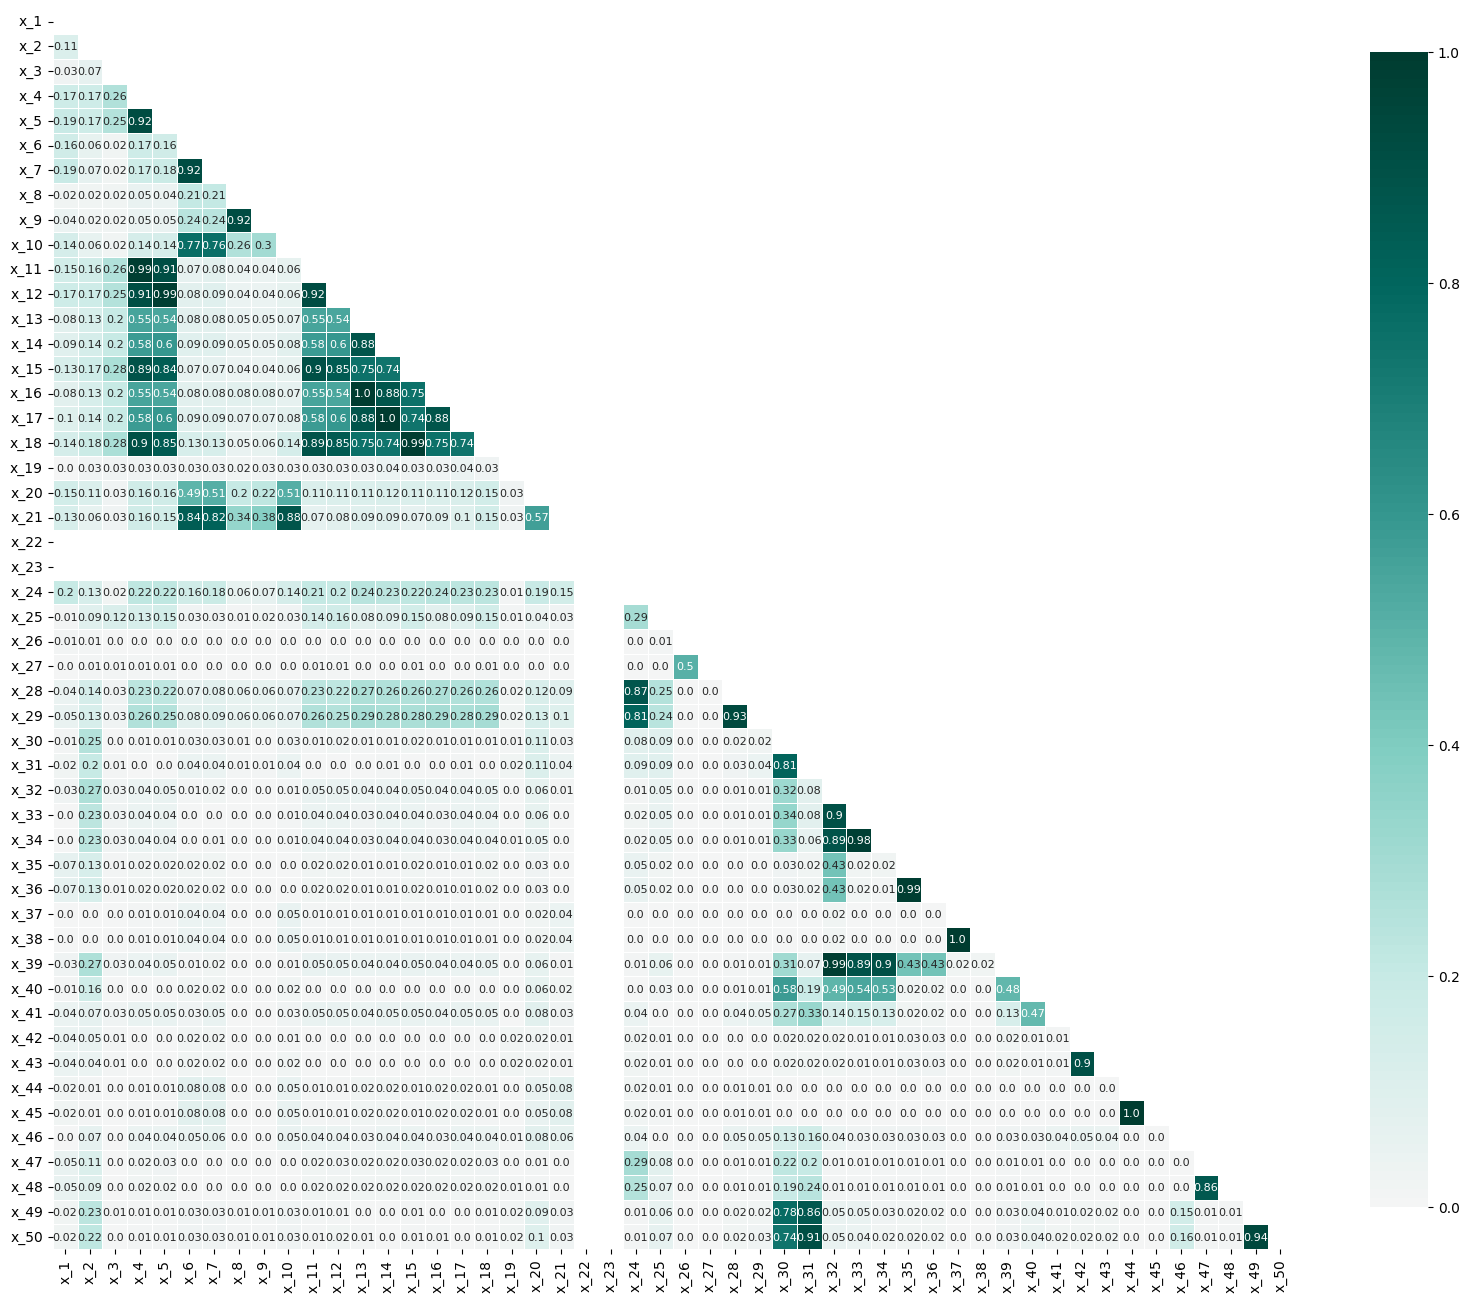

In [22]:
# Mapa de calor da correlação entre as variáveis
plt.subplots(figsize=(20, 20))
sns.heatmap(abs(corr),
            mask=np.triu(np.ones_like(corr, dtype=bool)),
            cmap='BrBG', center=0, cbar_kws={"shrink": .75},
            annot=abs(corr), annot_kws={"fontsize":8}, fmt='',
            square=True, linewidths=.5);

## variância

In [30]:
from sklearn.feature_selection import VarianceThreshold

In [37]:
selector = VarianceThreshold(threshold=0.01)
selector.fit_transform(X)

array([[0.18, 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.29, 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.18, 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.18, 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.2 , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.41, 0.  , 1.  , ..., 0.  , 0.  , 0.  ]])

In [38]:
selector.get_feature_names_out()

array(['x_2', 'x_20', 'x_24', 'x_25', 'x_28', 'x_29', 'x_30', 'x_31',
       'x_32', 'x_33', 'x_34', 'x_35', 'x_39', 'x_40', 'x_49', 'x_50'],
      dtype=object)

## anova

In [39]:
from sklearn.feature_selection import f_classif

In [40]:
anova = f_classif(X, y)
anova

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [21 22] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(array([1.52220113e+00, 7.88508493e+02, 2.31748825e-05, 8.14903704e+00,
        9.40258770e-01, 7.39706043e-01, 9.73564713e-03, 2.80963035e+01,
        3.03135788e+01, 7.24562366e-01, 7.72838558e+00, 1.13182555e+00,
        6.61158055e+01, 3.51094176e+01, 5.78947362e+01, 7.02264087e+01,
        3.73876027e+01, 5.71827762e+01, 1.97275000e-02, 1.96513337e-01,
        6.96405951e+00,            nan,            nan, 8.23104956e+01,
        1.41857747e+03, 3.29617102e-01, 8.23975034e-02, 1.65903276e+02,
        5.93299071e+01, 1.11177629e+02, 8.93030701e+01, 1.18615826e+02,
        8.97317674e+01, 9.02633190e+01, 2.81133936e+01, 2.75695162e+01,
        8.23975034e-02, 8.23975034e-02, 1.19467667e+02, 3.05602369e+01,
        4.14485613e+00, 2.25177983e+00, 1.32583531e+00, 8.23975034e-02,
        8.23975034e-02, 4.81298481e+00, 1.14136900e+01, 8.46929247e+00,
        6.98557891e+01, 7.86461753e+01]),
 array([2.17290514e-001, 1.30228413e-172, 9.96158987e-001, 4.30956847e-003,
        3.32214387

In [41]:
# Formatação das informações obtidas em um novo dataframe
imp = pd.DataFrame(X.columns, columns=['variavel'])
imp['importancia'] = anova[1]
imp

,variavel,importancia
0,x_1,2.172905e-01
1,x_2,1.302284e-172
2,x_3,9.961590e-01
3,x_4,4.309568e-03
4,x_5,3.322144e-01
5,x_6,3.897578e-01
6,x_7,9.214010e-01
7,x_8,1.157472e-07
8,x_9,3.687285e-08
9,x_10,3.946541e-01


In [43]:
imp.sort_values('importancia',ascending=True)[:20]

,variavel,importancia
24,x_25,1.344170e-307
1,x_2,1.302284e-172
27,x_28,6.363862e-38
38,x_39,8.677240e-28
31,x_32,1.332275e-27
29,x_30,5.638279e-26
33,x_34,2.142657e-21
32,x_33,2.802174e-21
30,x_31,3.479307e-21
23,x_24,1.189854e-19


## importância intrínseca (RF)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc = RandomForestClassifier(n_jobs=-1)
rfc.fit(X, y)

<ipython-input-45-1df86626614f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X, y)


RandomForestClassifier(n_jobs=-1)

In [46]:
rfc.feature_importances_

array([2.25872774e-02, 2.87378185e-01, 5.45378081e-02, 4.91938272e-02,
       6.70450624e-02, 1.84671527e-03, 2.04948104e-03, 2.56940737e-03,
       2.49398915e-03, 1.94155728e-03, 4.94227033e-02, 6.60043648e-02,
       2.60314346e-02, 4.39240111e-02, 5.38286102e-02, 2.61608576e-02,
       3.98287740e-02, 5.22473061e-02, 4.98752237e-03, 5.09436352e-03,
       1.01739171e-03, 0.00000000e+00, 0.00000000e+00, 4.22748256e-03,
       8.53320941e-02, 2.18929639e-05, 1.65436116e-06, 5.25419146e-03,
       8.40969257e-03, 5.26309032e-03, 4.87183081e-03, 4.91637017e-03,
       1.74150569e-03, 1.71566734e-03, 7.48650461e-04, 2.74154238e-04,
       1.15062835e-07, 3.32629012e-08, 3.84235263e-03, 2.04093146e-03,
       7.81210020e-04, 7.84245447e-04, 4.69450349e-04, 1.95949988e-06,
       0.00000000e+00, 1.40849336e-03, 1.87102400e-04, 1.41666983e-05,
       3.88969941e-03, 3.61131425e-03])

In [47]:
imp = pd.DataFrame(X.columns, columns=['variavel'])
imp['importancia'] = rfc.feature_importances_
imp

,variavel,importancia
0,x_1,2.258728e-02
1,x_2,2.873782e-01
2,x_3,5.453781e-02
3,x_4,4.919383e-02
4,x_5,6.704506e-02
5,x_6,1.846715e-03
6,x_7,2.049481e-03
7,x_8,2.569407e-03
8,x_9,2.493989e-03
9,x_10,1.941557e-03


In [48]:
imp.sort_values('importancia',ascending=False)[:20]

,variavel,importancia
1,x_2,0.287378
24,x_25,0.085332
4,x_5,0.067045
11,x_12,0.066004
2,x_3,0.054538
14,x_15,0.053829
17,x_18,0.052247
10,x_11,0.049423
3,x_4,0.049194
13,x_14,0.043924


# permutation importance

In [56]:
from sklearn.inspection import permutation_importance

In [59]:
r = permutation_importance(rfc, X, y, n_repeats=3, random_state=0)

In [61]:
for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f"{X.columns[i]:<8}"
    f"{r.importances_mean[i]:.5f}"
    f" +/- {r.importances_std[i]:.5f}")

x_2     0.00677 +/- 0.00012
x_15    0.00418 +/- 0.00006
x_18    0.00374 +/- 0.00005
x_12    0.00362 +/- 0.00004
x_25    0.00354 +/- 0.00011
x_17    0.00337 +/- 0.00007
x_14    0.00333 +/- 0.00006
x_11    0.00302 +/- 0.00008
x_13    0.00268 +/- 0.00002
x_16    0.00267 +/- 0.00003
x_4     0.00255 +/- 0.00002
x_5     0.00249 +/- 0.00004
x_28    0.00209 +/- 0.00011
x_3     0.00208 +/- 0.00004
x_24    0.00100 +/- 0.00003
x_1     0.00089 +/- 0.00006
x_29    0.00077 +/- 0.00002
x_30    0.00059 +/- 0.00005
x_32    0.00038 +/- 0.00002
x_39    0.00030 +/- 0.00004
x_31    0.00028 +/- 0.00003
x_49    0.00024 +/- 0.00003
x_20    0.00018 +/- 0.00002
x_40    0.00017 +/- 0.00003
x_19    0.00014 +/- 0.00002
x_41    0.00011 +/- 0.00000
x_33    0.00010 +/- 0.00004
x_50    0.00009 +/- 0.00002
x_46    0.00008 +/- 0.00002
x_34    0.00006 +/- 0.00002
x_10    0.00004 +/- 0.00000
x_8     0.00004 +/- 0.00000
x_9     0.00004 +/- 0.00000
x_7     0.00004 +/- 0.00001
x_6     0.00003 +/- 0.00000
x_42    0.00002 +/- 

## mutual information

In [49]:
from sklearn.feature_selection import mutual_info_classif

In [50]:
mif = mutual_info_classif(X, y, random_state = 14)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


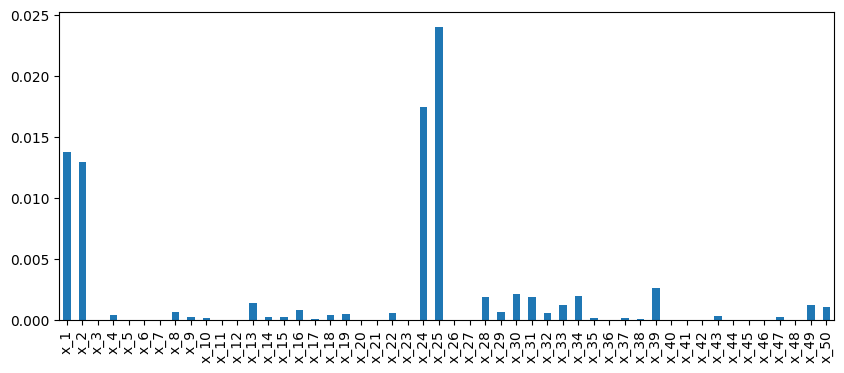

In [54]:
# Formatação para df
importance_mif = pd.Series(mif, index=X.columns)

# Análise gráfica
importance_mif.plot.bar(figsize=(10,4));

In [55]:
importance_mif.sort_values(ascending=False)[:20]

x_25    0.024044
x_24    0.017463
x_1     0.013776
x_2     0.012973
x_39    0.002685
x_30    0.002171
x_34    0.001952
x_28    0.001927
x_31    0.001875
x_13    0.001451
x_33    0.001244
x_49    0.001213
x_50    0.001075
x_16    0.000833
x_29    0.000712
x_8     0.000660
x_22    0.000564
x_32    0.000559
x_19    0.000525
x_4     0.000472
dtype: float64